Importamos las librerías:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, PredictionErrorDisplay

%matplotlib inline
sns.set_theme()

# Conjunto de datos

## Carga de datos desde archivo
Cargamos el dataset y nos quedamos con los datos pertenecientes a la descarga (estado 3), y tan solo dos columnas. También eliminamos duplicados, lo que nos da un total de 7444 muestras.

In [12]:
df = pd.read_excel('dataset.xlsx')
df = df[df["State"] == 3]
df = df[['V', 'SOC']]
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7444 entries, 121 to 16125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       7444 non-null   float64
 1   SOC     7444 non-null   float64
dtypes: float64(2)
memory usage: 174.5 KB


## Selección de atributos de entrada y salida
Nos quedamos con la tensión como única variable predictora.

In [13]:
X = np.asarray(df[df.columns[0]])
y = np.asarray(df[df.columns[1]])

## División en entrenamiento y prueba
Partimos los datos en 70% para entrenamiento y 30% para prueba. También fijamos la semilla para obtener resultados reproducibles en las sucesivas ejecuciones, y que todos los modelos entrenen en los mismos datos.

In [14]:
rng = np.random.RandomState(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rng)

#Modelos de regresión lineales
En sckikit learn se encuentran múltiples algoritmos y modelos de aprendizaje automático denominados estimadores.

Para cada uno realizaremos el preprocesamiento correspondiente (en caso de ser necesario), seguido de una búsqueda de los mejores hiperparámetros valiéndonos de una validación cruzada, para finalmente realizar una evaluación final del mejor modelo sobre el conjunto de prueba.

## Mínimos cuadrados ordinarios
Empleamos regresión polinómica variando el grado del polinomio de 2 a 100.

Mejor modelo: {'polynomialfeatures__degree': 92}
MSE train: 1.1276
Mean fit time 0.0328
Mean score time: 0.0042

MSE test: 1.1705
RMSE test: 1.0819
MAE test: 0.8971

Gráfico de valor real vs estimación


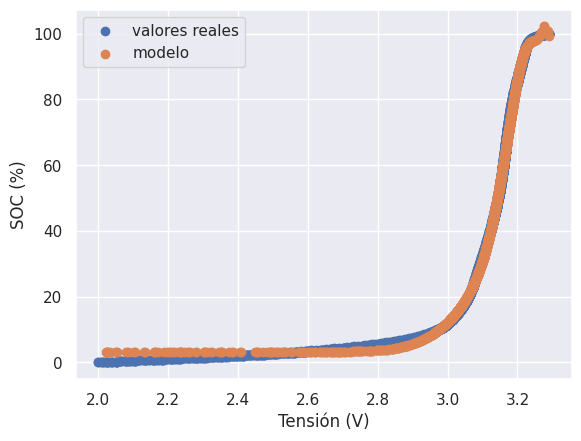

In [ ]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())

param_grid = {'polynomialfeatures__degree': range(2, 101)}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

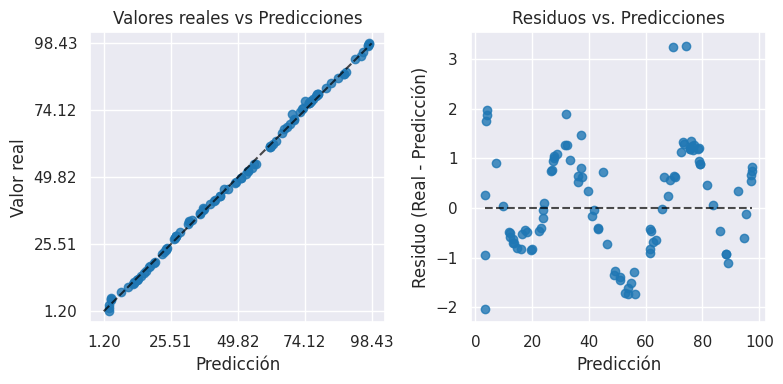

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

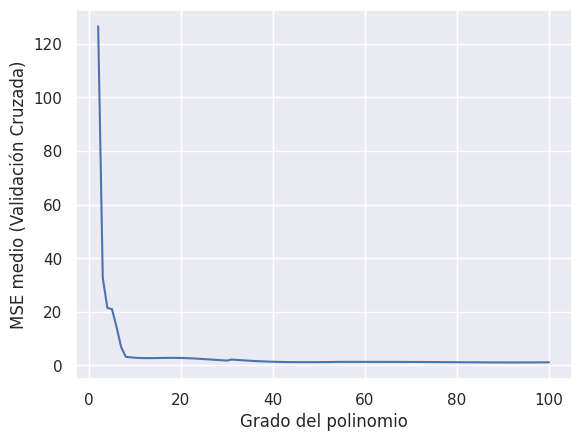

In [ ]:
#evolución del error conforme aumenta el grado del polinomio
plt.plot(range(2, 101), -grid_search.cv_results_['mean_test_score'])
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.show()

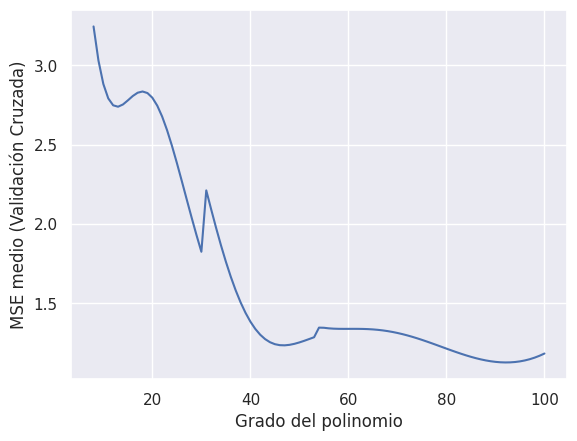

In [ ]:
#descartamos los primeros valores con un error muy alto para ver mejor la forma
plt.plot(range(8, 101), -grid_search.cv_results_['mean_test_score'][-93:])
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.show()

## Mínimos cuadrados ordinarios con estandarización
Empleamos regresión polinómica variando el grado del polinomio de 2 a 50. Previamente utilizamos stardard scaler.

Mejor modelo: {'polynomialfeatures__degree': 14}
MSE train: 1.1825
Mean fit time 0.0053
Mean score time: 0.0024

MSE test: 1.1856
RMSE test: 1.0889
MAE test: 0.8931

Gráfico de valor real vs estimación


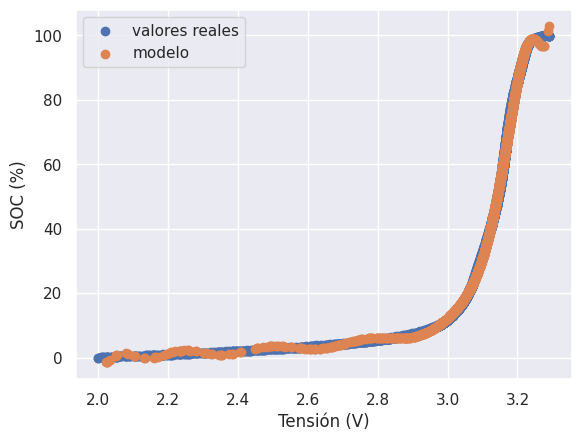

In [ ]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())

param_grid = {'polynomialfeatures__degree': range(2, 51)}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

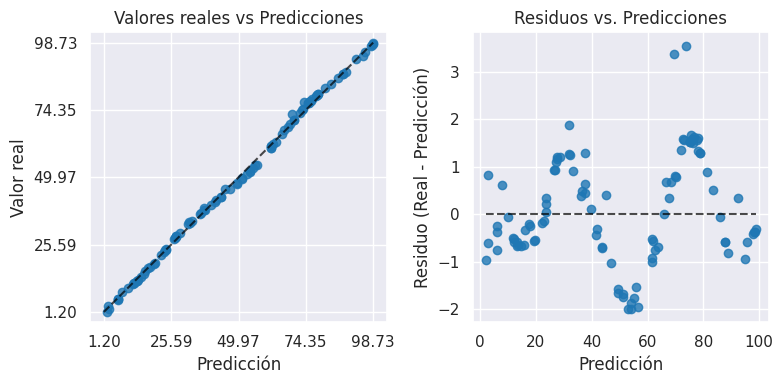

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

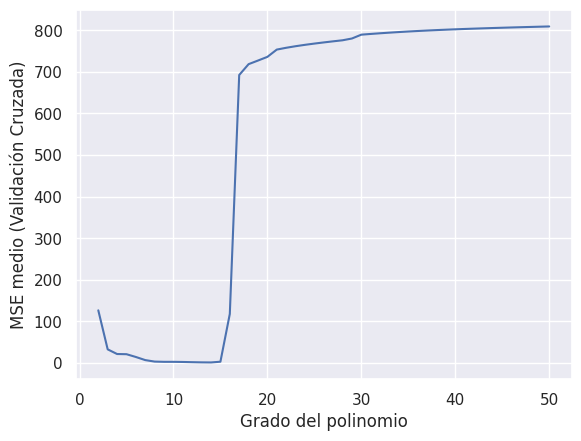

In [ ]:
#evolución del error conforme aumenta el grado del polinomio
plt.plot(range(2, 51), -grid_search.cv_results_['mean_test_score'])
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.show()

#Support Vector Regression (SVR)

Mejor modelo: {'svr__C': 1000.0, 'svr__epsilon': 0.5}
MSE train: 0.9559
Mean fit time 8.5968
Mean score time: 0.1138

MSE test: 0.9497
RMSE test: 0.9745
MAE test: 0.7783

Gráfico de valor real vs estimación


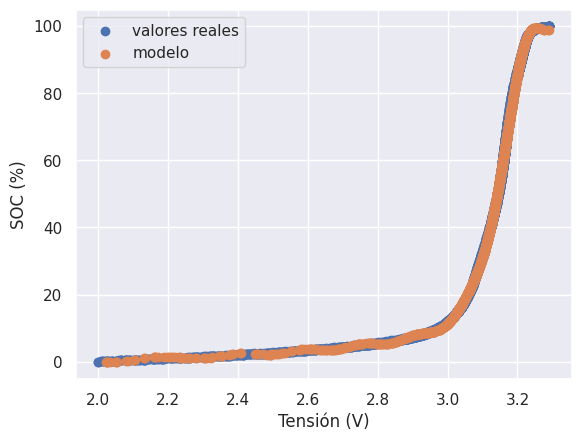

In [ ]:
model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

param_grid = {'svr__C': [1.0, 10.0, 100.0, 1000.0],
              'svr__epsilon': [0.01, 0.1, 0.5, 1.0]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

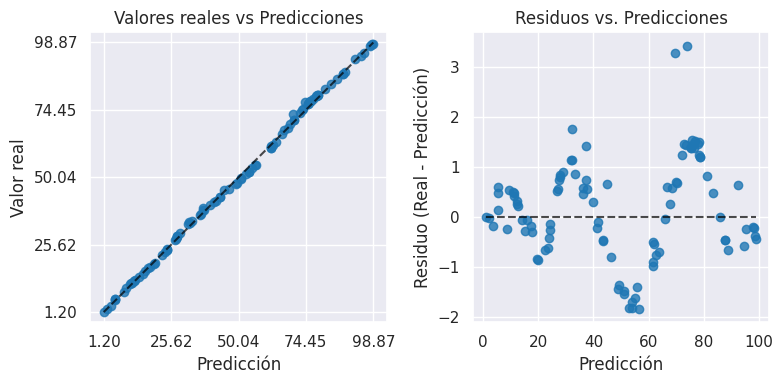

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

#Kernel Ridge Regression (KRR)

Mejor modelo: {'kernelridge__alpha': 0.001, 'kernelridge__gamma': 10.0}
MSE train: 0.2276
Mean fit time 2.1645
Mean score time: 0.0925

MSE test: 0.2630
RMSE test: 0.5128
MAE test: 0.2790

Gráfico de valor real vs estimación


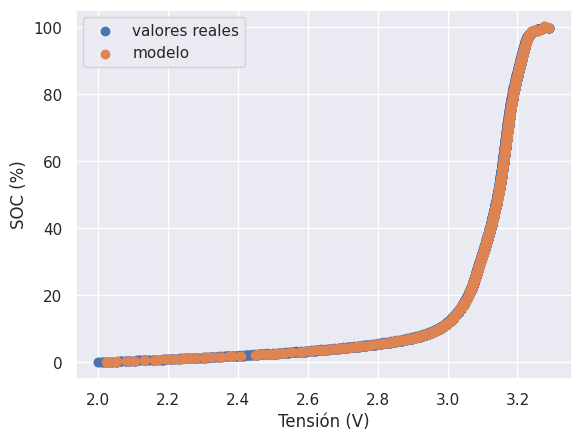

In [ ]:
model = make_pipeline(StandardScaler(), KernelRidge(kernel='rbf'))

param_grid = {'kernelridge__alpha': [0.001, 0.01, 0.1, 1.0],
              'kernelridge__gamma': [0.1, 1.0, 10.0]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')

grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

Intentamos afinarlo más

Mejor modelo: {'kernelridge__alpha': 1e-06, 'kernelridge__gamma': 12.0}
MSE train: 0.2220
Mean fit time 1.7998
Mean score time: 0.0937

MSE test: 0.2589
RMSE test: 0.5088
MAE test: 0.2710

Gráfico de valor real vs estimación


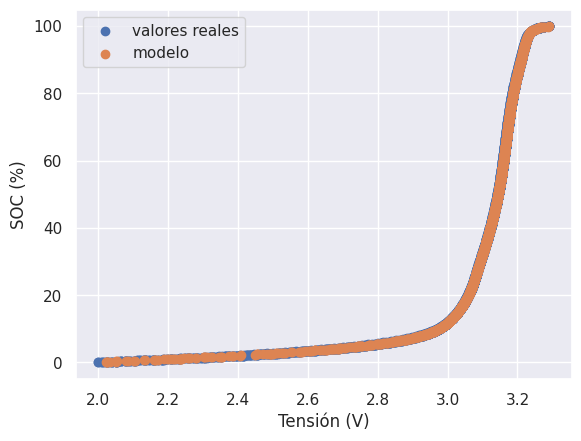

In [28]:
model = make_pipeline(StandardScaler(), KernelRidge(kernel='rbf'))

param_grid = {'kernelridge__alpha': [1e-6],
              'kernelridge__gamma': [11.0, 12.0, 13.0]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')

grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

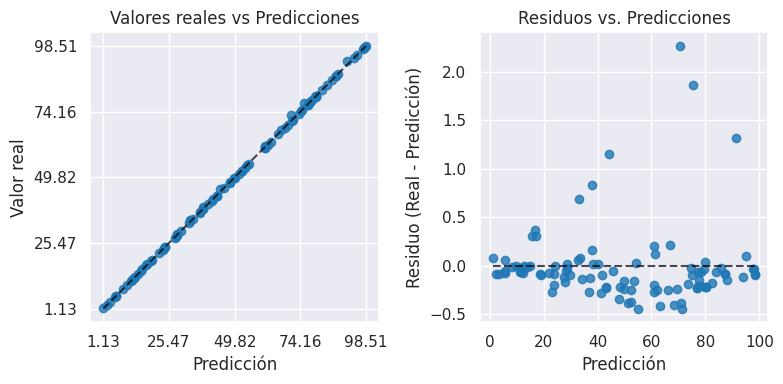

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

#K-Nearest Neighbors (kNN)

Mejor modelo: {'n_neighbors': 30, 'weights': 'uniform'}
MSE train: 0.2325
Mean fit time 0.0069
Mean score time: 0.0179

MSE test: 0.2698
RMSE test: 0.5194
MAE test: 0.2739

Gráfico de valor real vs estimación


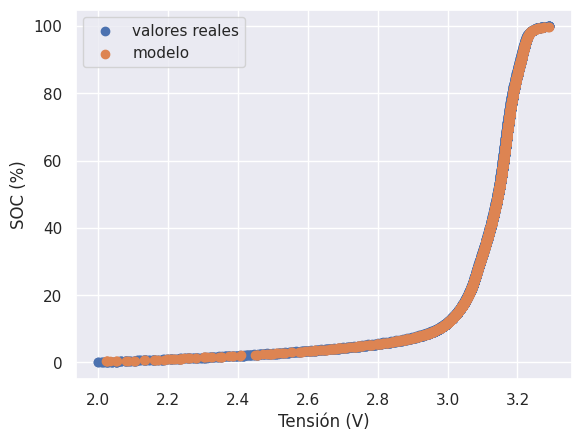

In [8]:
#model = model = make_pipeline(StandardScaler(), KNeighborsRegressor())

#param_grid = {'kneighborsregressor__weights': ['uniform', 'distance'],
#              'kneighborsregressor__n_neighbors': range(2, 101)}

model = KNeighborsRegressor()

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(2, 101)}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

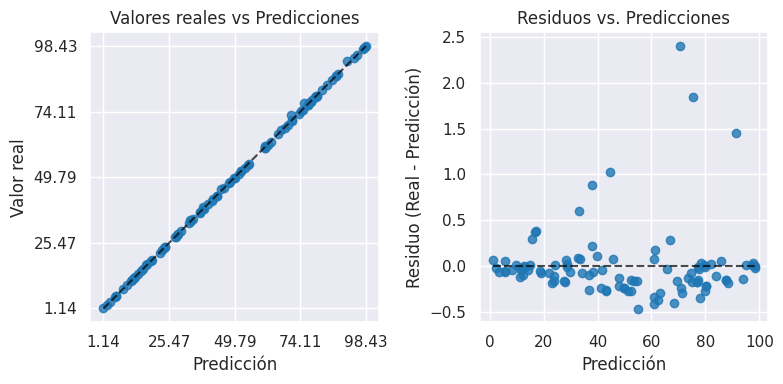

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

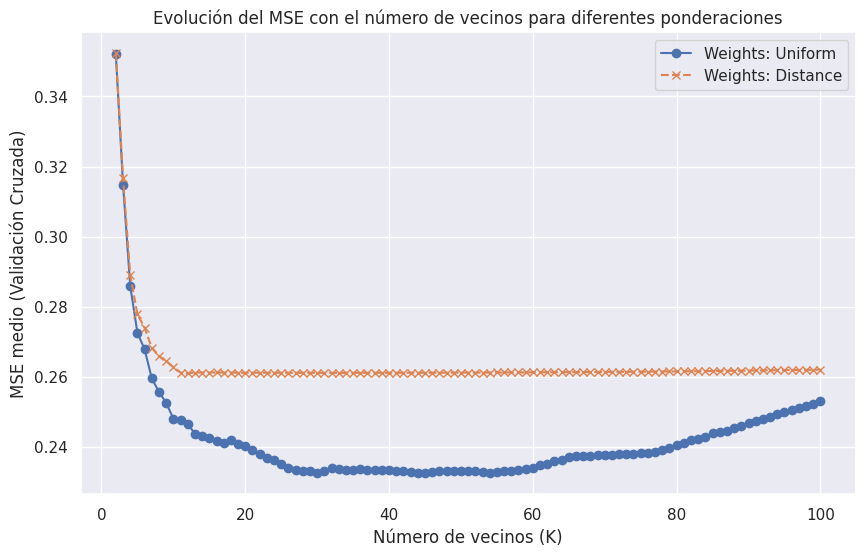

In [10]:
results = grid_search.cv_results_
n_neighbors_values = param_grid['n_neighbors']

uniform_scores_indices = [i for i, params in enumerate(results['params']) if params['weights'] == 'uniform']
uniform_mse_mean = -results['mean_test_score'][uniform_scores_indices]

distance_scores_indices = [i for i, params in enumerate(results['params']) if params['weights'] == 'distance']
distance_mse_mean = -results['mean_test_score'][distance_scores_indices]

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, uniform_mse_mean, label='Weights: Uniform', marker='o', linestyle='-')
plt.plot(n_neighbors_values, distance_mse_mean, label='Weights: Distance', marker='x', linestyle='--')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.title('Evolución del MSE con el número de vecinos para diferentes ponderaciones')
plt.legend()
plt.show()

#Decision Tree Regression

Mejor modelo: {'decisiontreeregressor__max_depth': 8}
MSE train: 0.2570
Mean fit time 0.0049
Mean score time: 0.0017

MSE test: 0.2990
RMSE test: 0.5468
MAE test: 0.3188

Gráfico de valor real vs estimación


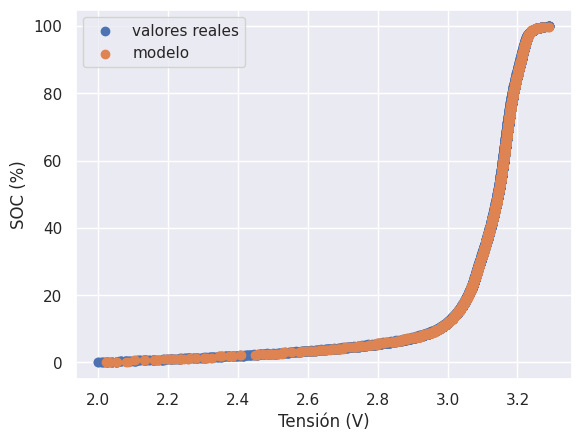

In [ ]:
model = make_pipeline(StandardScaler(), DecisionTreeRegressor())

param_grid = {'decisiontreeregressor__max_depth': range(2, 101)}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

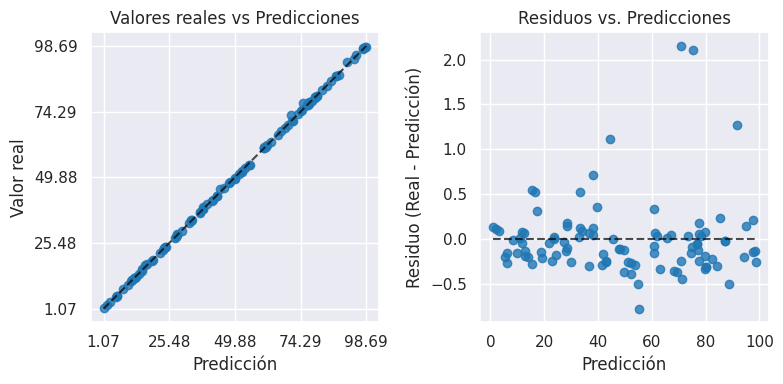

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

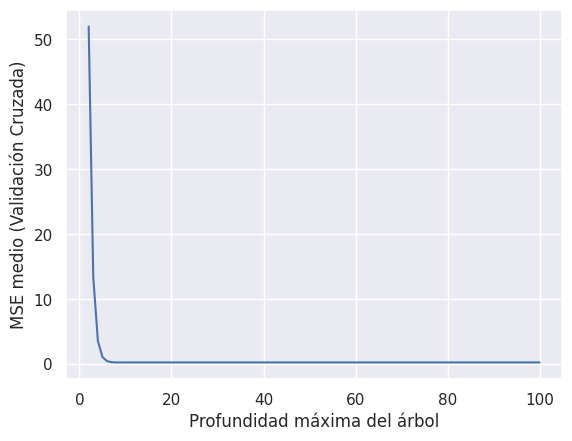

In [ ]:
#Evolucion del error conforme se aumenta la profundidad
plt.plot(range(2, 101), -grid_search.cv_results_['mean_test_score'])
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.show()

#Ensembles

Mejor modelo: {'histgradientboostingregressor__max_iter': 100}
MSE train: 0.2519
Mean fit time 0.1912
Mean score time: 0.0129

MSE test: 0.2848
RMSE test: 0.5337
MAE test: 0.3073

Gráfico de valor real vs estimación


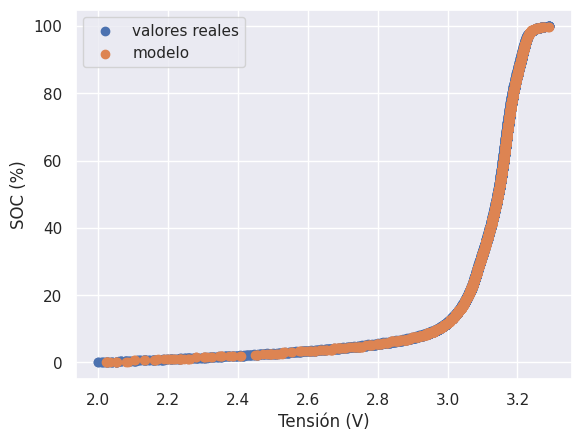

In [ ]:
model = make_pipeline(StandardScaler(), HistGradientBoostingRegressor())

param_grid = {'histgradientboostingregressor__max_iter': [10, 20, 50, 100, 300, 500]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

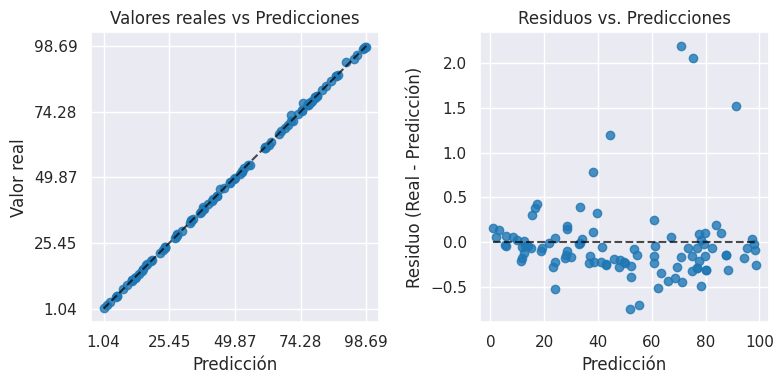

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

#Multi-Layer Perceptron (MLP)

Mejor modelo: {'mlpregressor__activation': 'tanh', 'mlpregressor__hidden_layer_sizes': (100,)}
MSE train: 0.2219
Mean fit time 38.0500
Mean score time: 0.0102

MSE test: 0.2591
RMSE test: 0.5090
MAE test: 0.2706

Gráfico de valor real vs estimación


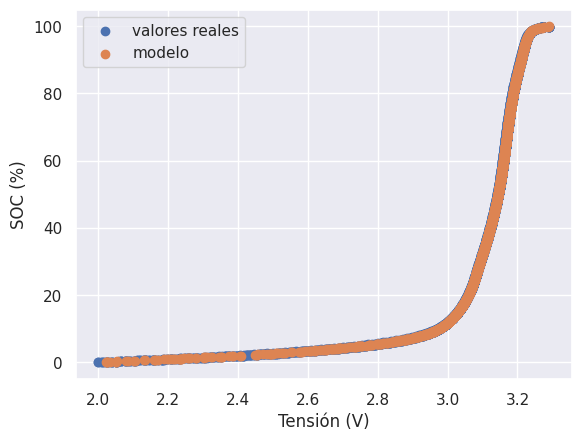

In [23]:
model = make_pipeline(StandardScaler(), MLPRegressor(solver='lbfgs',
                                                     max_iter=5000,
                                                     random_state=rng))

param_grid = {'mlpregressor__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
              'mlpregressor__activation': ['relu', 'tanh']}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

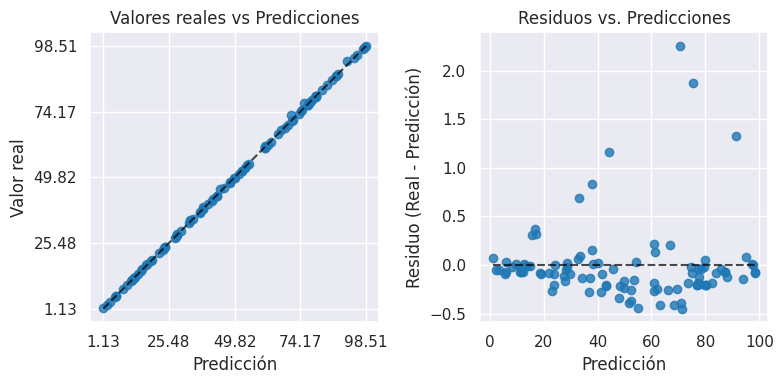

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

La transformación de la variable objetivo reduce considerablemente el tiempo de entrenamiento al alcanzar más rápido la convergencia, pero los resultados son peores.

Mejor modelo: {'mlpregressor__activation': 'relu', 'mlpregressor__hidden_layer_sizes': (50, 50)}
Mean fit time 4.5062
Mean score time: 0.0066

MSE train: 0.2352
MSE test: 0.2726
RMSE test: 0.5221
MAE test: 0.2965

Gráfico de valor real vs estimación


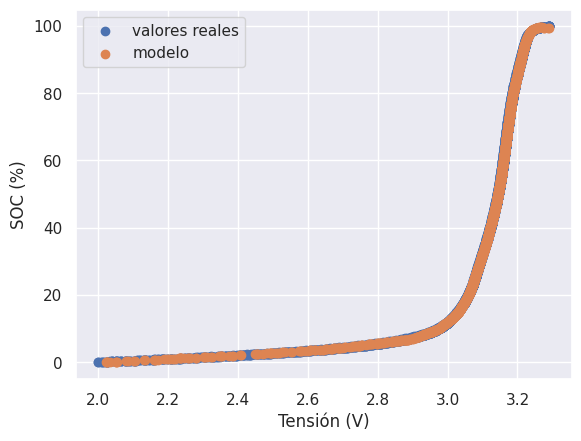

In [22]:
scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

model = make_pipeline(StandardScaler(), MLPRegressor(solver='lbfgs',
                                                     max_iter=5000,
                                                     random_state=rng))

param_grid = {'mlpregressor__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
              'mlpregressor__activation': ['relu', 'tanh']}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train_scaled)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")

print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_train_pred_scaled = grid_search.best_estimator_.predict(X_train.reshape(-1, 1))
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
print(f"MSE train: {mean_squared_error(y_train, y_train_pred):.4f}")
y_test_pred_scaled = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
y_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()